In [1]:
#lagrange
import numpy as np
import matplotlib.pyplot as plt
import sys
import sympy as sp

x = sp.Symbol('x')
points = [(0,1),(1,0.765198),(2,0.223891),(3,-0.260052)]
l = ["L0","L1","L2","L3"]
n = len(points)

def main():
	P = lagrange()
	color = ['b','g','r','m','c']
	for i in range(4):
		Li = sp.simplify(g(i))
		print("L"+str(i)+" : " + str(sp.expand(Li)))
		plot(Li,color[i],l[i])

	print("P3(x) : " + str(sp.expand(P)))
	plot(P,color[4],"p3(x)")

	x_list = []
	y_list = []
	for x_p, y_p in points:
		x_list.append(x_p)
		y_list.append(y_p)
	plt.plot(x_list, y_list,  'ro',label = "data points")

	plt.xlabel("X - Axis")
	plt.ylabel("Y - Axis")
	plt.xlim(-1, 4)
	plt.ylim(-2, 4)
	plt.legend(loc='upper center',numpoints = 1)
	plt.show()
	

def plot(f,color,la):
	t = np.arange(-1,4,0.01)
	y = [ f.evalf(subs = {x:i}) for i in t]
	plot = plt.plot( t, y,color,label = la,linewidth=1.5)

def g(i):			
	tot_mul = 1
	for j in xrange(n):
		if i != j:
			xj, yj = points[j]
			tot_mul *= (x - xj) / float(points[i][0] - xj)
		
	return tot_mul

def lagrange():
	total = 0
	for i in xrange(n):
		total += points[i][1] * g(i)
	total = (sp.simplify(total))
	return total

main()

NameError: name 'xrange' is not defined

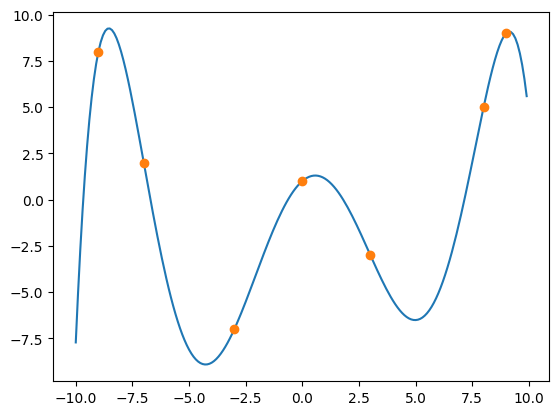

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def readfile(filename):
	coordinates = []
	with open(filename) as f:
		lines = f.readlines()
		for line in lines[1:]: 
			values = line.split()
			coordinate = (float(values[0]) ,
				 float(values[1]) )
			coordinates.append(coordinate)
	return coordinates
	
def lagrange(coordinates, x):
	n = len(coordinates)
	y = 0.0
	
	for i in range(n):
		fi = coordinates[i][1]
		prod = fi
		for j in range(n):
			if j !=i:
				xi = coordinates[i][0]
				xj = coordinates[j][0]
				prod = prod * ((x-xj)/(xi-xj))
		y+=prod
	return y
		

coordinates = readfile("data.txt")
X = [-7.0, -9.0, 0.0, 9.0, 8.0, 3.0, -3.0 ]
Y = [2.0, 8.0, 1.0, 9.0, 5.0, -3.0, -7.0]


xs = np.arange(-10,10,0.1)
ys = []
for x in xs:
	ys.append(lagrange(coordinates, x))
	
plt.plot(xs, ys)
plt.plot(X,Y,'o')
plt.show()

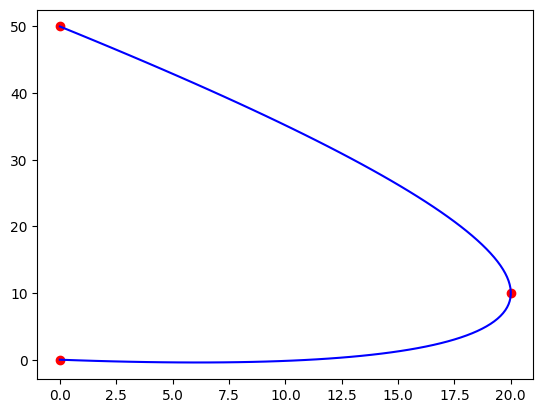

In [5]:
import numpy as np
import scipy.interpolate
import matplotlib.pyplot as plt

x_parabola = np.array([0, 20, 0]) # array for x
y_parabola = np.array([0, 10, 50]) # array for y
plt.figure()
u = plt.plot(x_parabola,y_parabola,'ro') # plot the points
t = np.linspace(0, 1, len(x_parabola)) # parameter t to parametrize x and y
pxLagrange = scipy.interpolate.lagrange(t, x_parabola) # X(T)
pyLagrange = scipy.interpolate.lagrange(t, y_parabola) # Y(T)
n = 100
ts = np.linspace(t[0],t[-1],n)
xLagrange = pxLagrange(ts) # lagrange x coordinates
yLagrange = pyLagrange(ts) # lagrange y coordinates
plt.plot(xLagrange, yLagrange,'b-',label = "Polynomial")
plt.show()

150
121.0
24.0
1.0
0.0
0
1
2
3
4
810.0
0
1
2
3
4


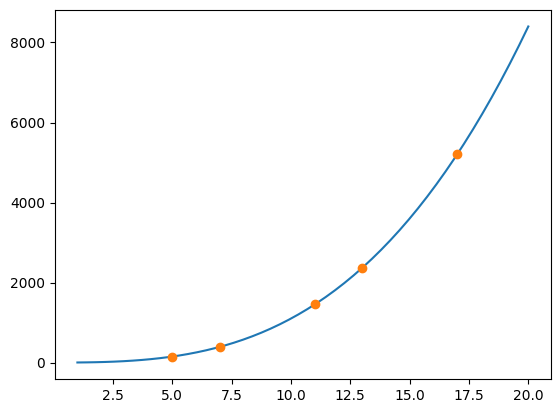

In [6]:
import numpy as np
def b(X, Y, r, l):
	if l==r:
		return Y[l]
	return ( b(X, Y, r, l+1) - b(X, Y, r-1, l) )/(X[r]-X[l])
	
X=[5, 7, 11, 13, 17]
Y=[150, 392, 1452, 2366, 5202]

def f(x):
	sum_ = 0.
	for i in range(len(X)):
		print(i)
		mul = b(X, Y, i, 0)
		for j in range(i):
			mul *= (x-X[j])
		sum_ += mul
	return sum_
	


for i in range(len(X)):
	print(b(X,Y,i,0))

print(f(9))


import matplotlib.pyplot as plt
import numpy as np
x  = np.linspace(1, 20)
y = f(x)
plt.plot(x, y)
plt.plot(X, Y, 'o')
plt.show()

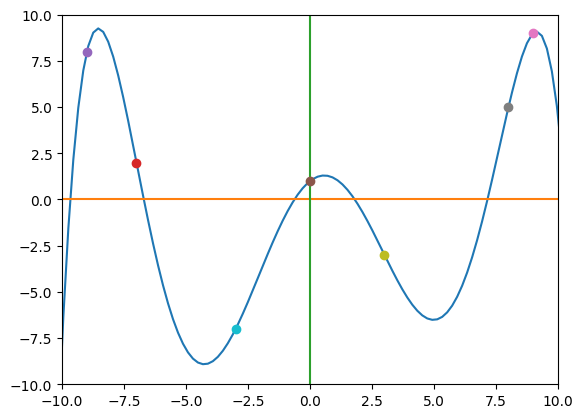

In [7]:
#newton
import random as rn
from numpy import *
import matplotlib.pyplot as plt

def f(points, x):
	res = 0.
	for i in range(len(points)):
		
		pro = 1.0
		for j in range(len(points)):
			if i != j:
				pro = pro * (x - points[j][0])/(points[i][0]-points[j][0])
		res = res + pro*points[i][1]
	
	
	
	return res
	

def proterm(i, value, x):  
    pro = 1;  
    for j in range(i):  
        pro = pro * (value - points[i][j]);  
    return pro; 


def dividedDiffTable(x, y, n): 
	for i in range(1, n):  
            for j in range(n - i):  
                y[j][i] = ((y[j][i - 1] - y[j + 1][i - 1]) /
                                 (x[j] - x[i + j])); 
            return y;



points = [
	[-7.0, 2.0],
	[-9.0, 8.0],
	[0.0, 1.0],
	[9.0 ,9.0],
	[8.0 ,5.0],
	[3.0, -3.0],
	[-3.0, -7.0]
	]

x = linspace(-20., 20., 200)
y = f(points, x)


X = linspace(-50, 50)
plt.plot(x, y)
plt.plot(x, x*0)
plt.plot(X*0, X)
for i in range(len(points)):
	plt.plot(points[i][0], points[i][1], 'o')
plt.ylim(-10,10)
plt.xlim(-10,10)
plt.show()